In [1]:
import numpy as np
np.random.seed=40

In [2]:
normal=np.random.randn(1000,2)*2
abnormal=np.random.randn(50,2)*10
normal_labels=np.zeros(1000)
abnormal_labels=np.ones(50)

In [3]:
data=np.vstack([normal, abnormal])

In [4]:
data.shape

(1050, 2)

In [5]:
labels=np.concatenate((normal_labels, abnormal_labels))

In [6]:
labels.shape

(1050,)

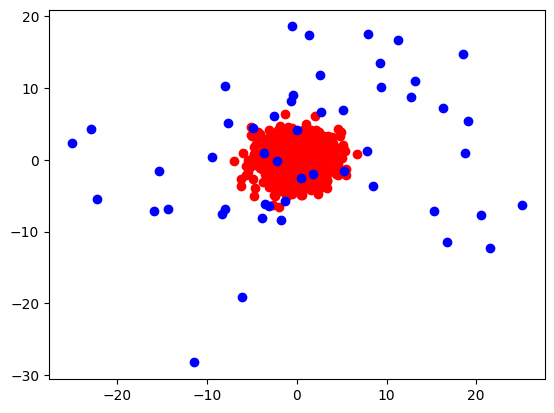

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data[labels==0,0], data[labels==0,1], c='red')
plt.scatter(data[labels==1,0], data[labels==1,1], c='blue')
plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(data, labels)

DecisionTreeClassifier()

In [9]:
dt_pred=dt.predict(data)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
print("Accuray: ", accuracy_score(labels, dt_pred))

Accuray:  1.0


In [12]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
y=km.fit_predict(data)

In [13]:
print("KMeans error: ", km.inertia_)

KMeans error:  15478.775272206745


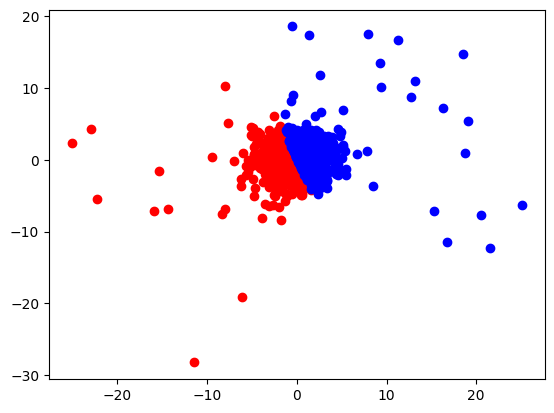

In [14]:
plt.scatter(data[y==0,0], data[y==0, 1], c='red')
plt.scatter(data[y==1,0], data[y==1,1], c='blue')
plt.show()

In [15]:
# !pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

In [16]:
kmed=KMedoids(n_clusters=2)
y_med=kmed.fit_predict(data)

In [17]:
print("KMedoids error: ", kmed.inertia_)

KMedoids error:  2734.9506810964467


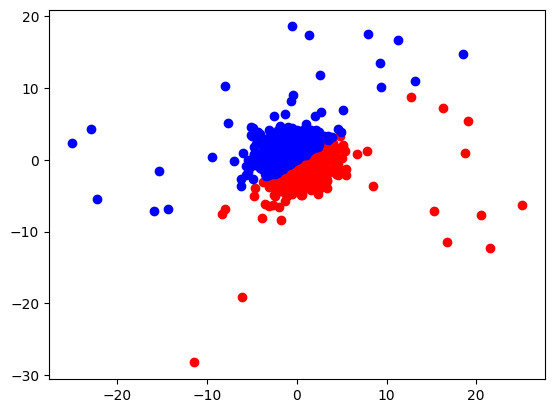

In [18]:
plt.scatter(data[y_med==0,0], data[y_med==0,1], c='red')
plt.scatter(data[y_med==1,0], data[y_med==1,1], c='blue')
plt.show()

In [19]:
from sklearn.ensemble import IsolationForest

In [20]:
it=IsolationForest()
it.fit(data)

IsolationForest()

In [21]:
y_it=it.predict(data)

In [22]:
y_it

array([ 1,  1,  1, ..., -1, -1, -1])

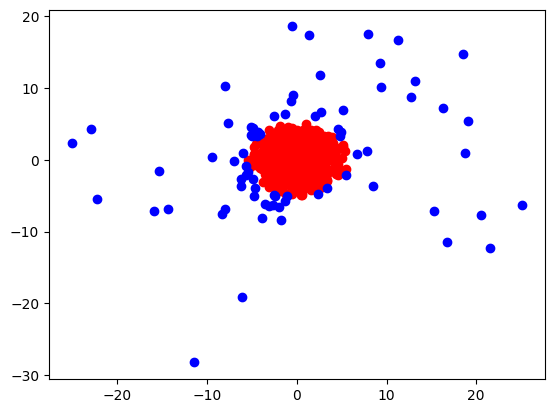

In [23]:
plt.scatter(data[y_it==1,0], data[y_it==1,1], c='red')
plt.scatter(data[y_it==-1,0], data[y_it==-1,1], c='blue')
plt.show()

In [24]:
mean=np.mean(normal)
std=np.std(normal)

In [25]:
from scipy.stats import norm

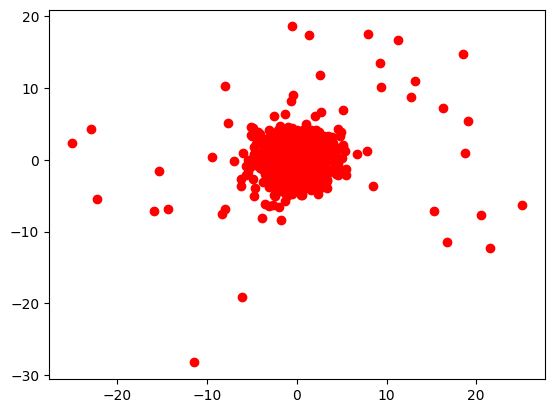

In [26]:
k=0
pred=[]
threshold=0.3
for i in data:
  pdf=min(norm.pdf(i, mean, std))
  if pdf<threshold:
    pred.append(1)
  else:
    pred.append(0)
pred=np.array(pred)

plt.scatter(data[pred==0,0], data[pred==0,1], c='green')
plt.scatter(data[pred==1,0], data[pred==1,1], c='red')
plt.show()